## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных
В данной работе вы будете использовать следующие наборы данных:
1. фывфыв
2. фывфв

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_data = Path('datasets')/'/content/drive/MyDrive/2023-Kufarov-TimeSeriesCourse-main/practice/07 Imputation and Forecast/datasets/madrid.txt'
madrid = np.loadtxt(path_data)[:,0] #тензор
print(madrid.shape)

(25000,)


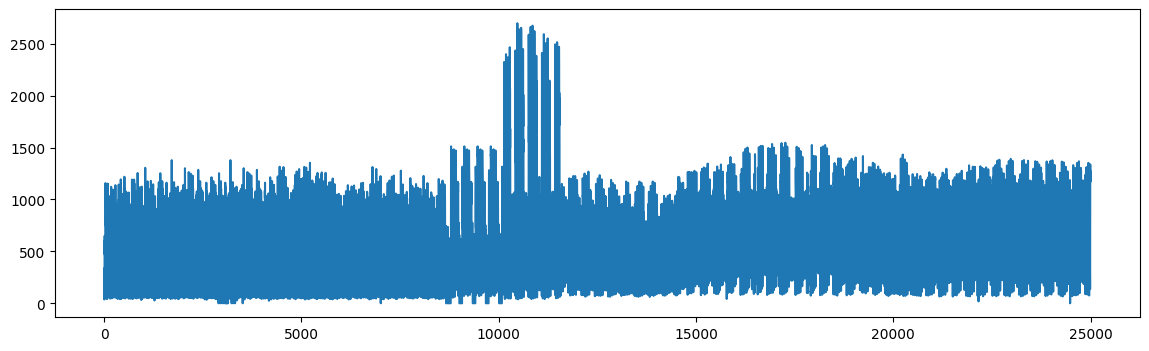

In [5]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значейни
   
Процен пропущенных значений должен регулироваться тедельным параметром.


In [6]:
import torch
def add_nan(x, percent = 0.25):
    modified_series = np.copy(x)
    total_values = x.size
    nan_count = int(percent * total_values)
    nan_indices = np.random.choice(total_values, nan_count, replace=False)
    modified_series.flat[nan_indices] = np.nan
    return modified_series, nan_indices

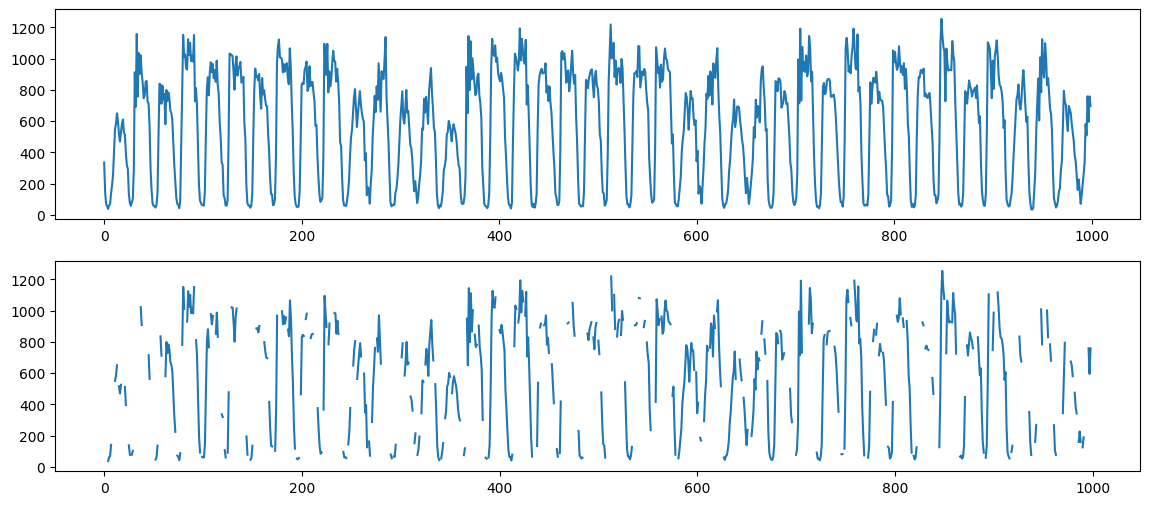

In [7]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [8]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [9]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

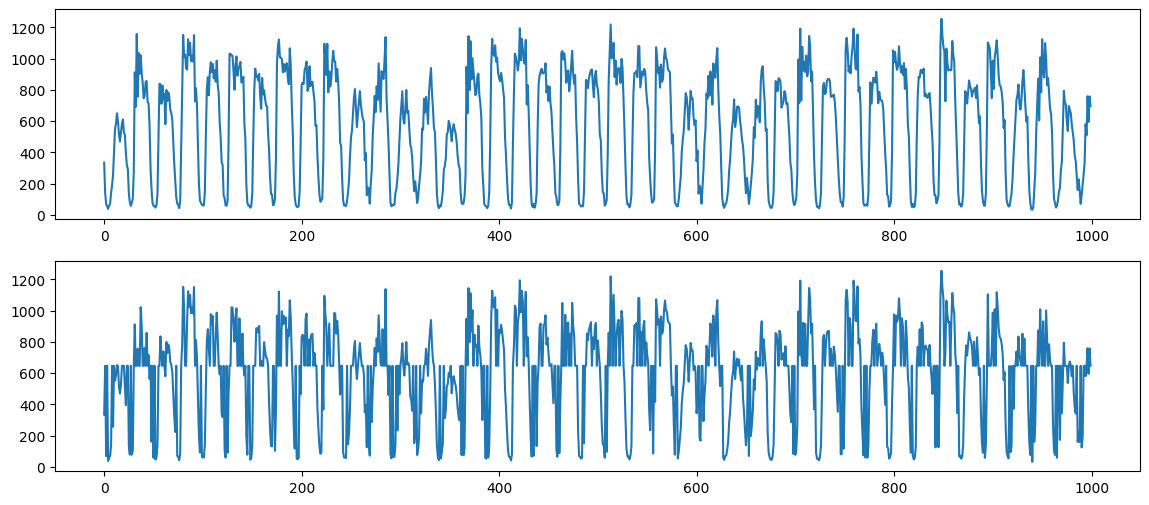

In [10]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [11]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [12]:
recovery['median'] = madrid_median

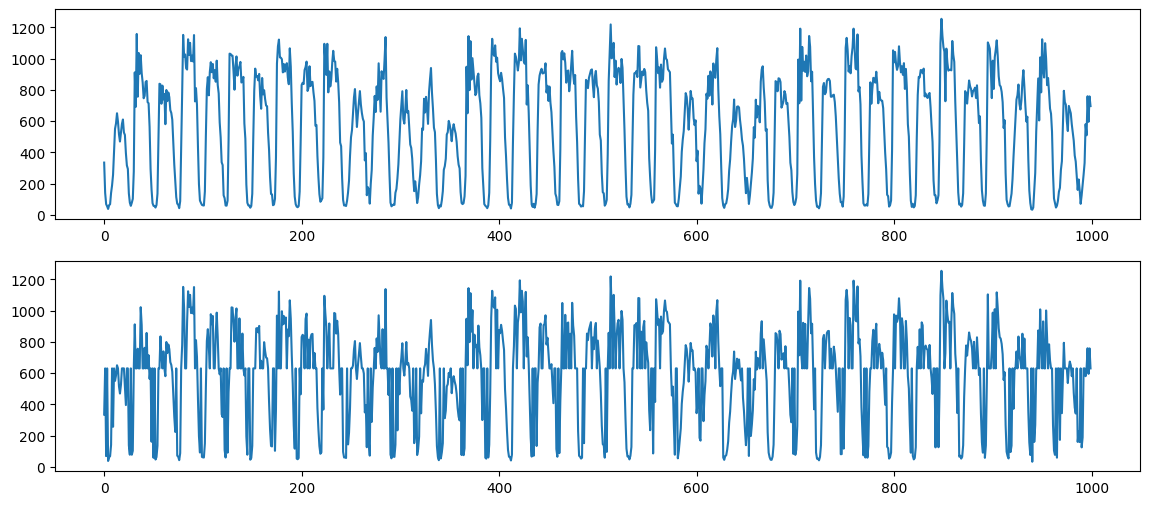

In [13]:
#madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7
.1*** и проведите востановление данных, сохратив результаты востановления.

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов востановления второй группы ***табл. .1*** и проведите востановление данных, сохратив результаты востановления.

In [14]:
from sklearn.impute import KNNImputer

In [15]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
madrid_slice = rolling_window(madrid_with_nan, 100)


In [16]:
knn_imputer = KNNImputer(n_neighbors=100)

In [17]:
restored_slices = []
for window_data in madrid_slice:
  window_data = window_data.reshape(-1 , 1)
  restored_window = knn_imputer.fit_transform(window_data)
  restored_slices.append(restored_window.flatten())

In [18]:
madrid_knn = np.concatenate(restored_slices)

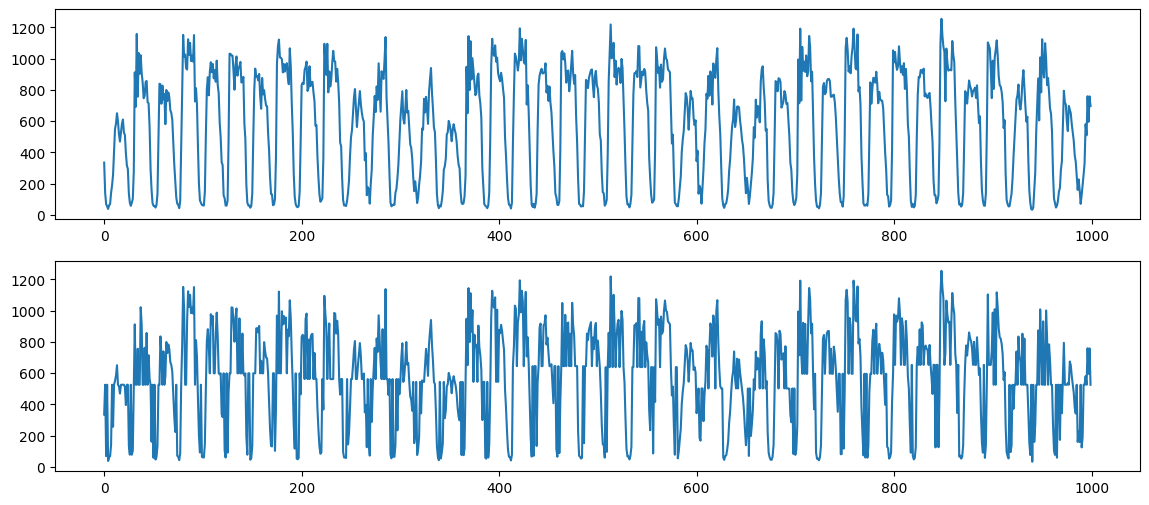

In [19]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_knn[:1000])
plt.show()

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов востановления третей группы ***табл. 7.1*** и проведите востановление данных, сохратив результаты востановления.

In [20]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=c1a71b8673676f82358bd28d16835278918412d6d967d0f2c8d035518e42ce8e
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=82dcf1aa3999fda5bd8432c64c5882f6900c00a7651e99a44781f80900e5c976
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [21]:
from fancyimpute import IterativeImputer
imputer = IterativeImputer()
madrid2 = imputer.fit_transform(madrid_with_nan.reshape(-1, 1))
madrid_imputer = madrid2.flatten()

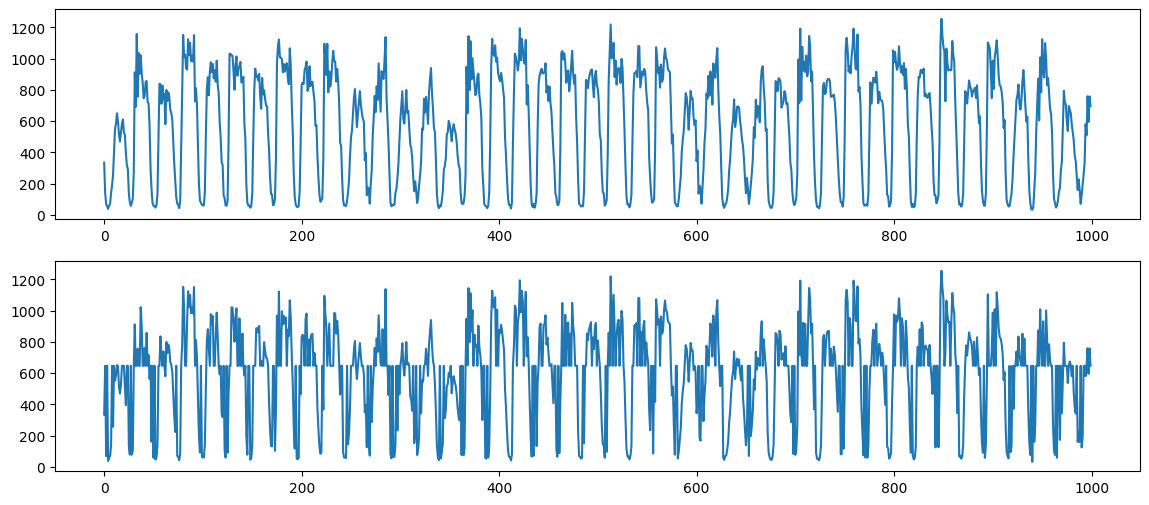

In [22]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_imputer[:1000])
plt.show()

##### 7.1.5 Сравнение результатов востановление.


Используя следующие библиотеки(список библиотек) отдельно для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов. Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



In [23]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(madrid, madrid_mean)
mse_median = mean_squared_error(madrid, madrid_median)
mse_knn = mean_squared_error(madrid, madrid_knn)
mse_imputer = mean_squared_error(madrid, madrid_imputer)

mse = [mse_mean, mse_median, mse_knn, mse_imputer]
for i in mse:
  print(f'MSE ({i})')



MSE (37844.929115625244)
MSE (37909.82792)
MSE (35101.350369548134)
MSE (37844.929115625244)


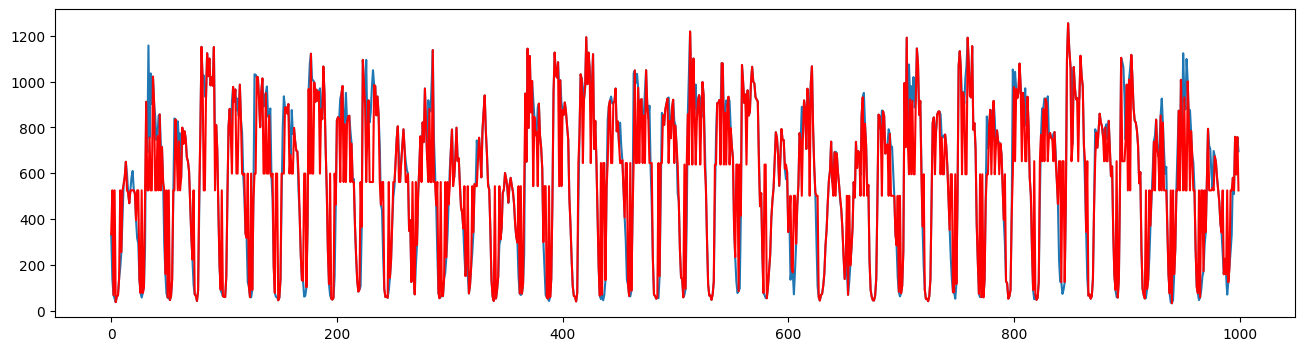

In [24]:
x = np.arange(len(madrid))
plt.figure(figsize=(16, 4))
plt.plot(x[:1000], madrid[:1000], label="madrid original")
plt.plot(x[:1000], madrid_knn[:1000], label="madrid knn", color="r")
plt.legend
plt.show()

*Вывод*: Из всех методов KNN справился лучше всех, выдав меньшую среднеквадратичную ошибку